In [1]:
import cirq
import pennylane as qml
import qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram, plot_state_city
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np
from qiskit_ionq import IonQProvider, ErrorMitigation

provider = IonQProvider()
simulator = AerSimulator()

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qiskit_ionq/ionq_backend.py:127: IonQTranspileLevelWarning: Transpiler default optimization_level=2. IonQ (QIS) recommends 0-1 to avoid aggressive re-synthesis; use transpile(..., optimization_level=1).
  warn_bad_transpile_level()


In [2]:
print(qiskit.version.get_version_info())

2.3.0


In [3]:
print(cirq.__version__)

1.6.1


In [4]:
print(qml.version())

0.42.2


# Tasks
- create a circuit with H-gate and Z-gate acting on the first qubit;
- create a circuit with X-gate and H-gate acting on the second qubit;
- create the Bell states
- extract the final state vector (before any measurement) and create a frequency plot from sampling the circuits 100 times

## Qiskit

In [5]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.z(0)
qc1.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ Z ├
     └───┘└───┘
q_1: ──────────

In [6]:
qc2 = QuantumCircuit(2)
qc2.x(1)
qc2.h(1)
qc2.draw()

q_0: ──────────
     ┌───┐┌───┐
q_1: ┤ X ├┤ H ├
     └───┘└───┘

In [7]:
bell1 = QuantumCircuit(2)
bell1.h(0)
bell1.cx(0,1)
bell1.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [8]:
bell2 = QuantumCircuit(2)
bell2.h(0)
bell2.cx(0,1)
bell2.cz(0,1)
bell2.draw()

┌───┐        
q_0: ┤ H ├──■───■─
     └───┘┌─┴─┐ │ 
q_1: ─────┤ X ├─■─
          └───┘

In [9]:
bell3 = QuantumCircuit(2)
bell3.h(0)
bell3.x(1)
bell3.cx(0,1)
bell3.draw()

┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ X ├┤ X ├
     └───┘└───┘

In [10]:
bell4 = QuantumCircuit(2)
bell4.h(0)
bell4.x(1)
bell4.cz(0,1)
bell4.cx(0,1)
bell4.draw()

┌───┐        
q_0: ┤ H ├─■───■──
     ├───┤ │ ┌─┴─┐
q_1: ┤ X ├─■─┤ X ├
     └───┘   └───┘

In [11]:
#circuit1 state vector
transpiled = transpile(qc1, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,
              0.        +0.j],
            dims=(2, 2))


In [12]:
#circuit2 state vector
transpiled = transpile(qc2, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [13]:
#bell1 state vector
transpiled = transpile(bell1, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [14]:
#bell2 state vector
transpiled = transpile(bell2, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j,
             -0.70710678+0.j],
            dims=(2, 2))


In [15]:
#bell3 state vector
transpiled = transpile(bell3, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,
             0.        +0.j],
            dims=(2, 2))


In [16]:
#bell4 state vector
transpiled = transpile(bell4, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([ 0.        +0.j, -0.70710678+0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


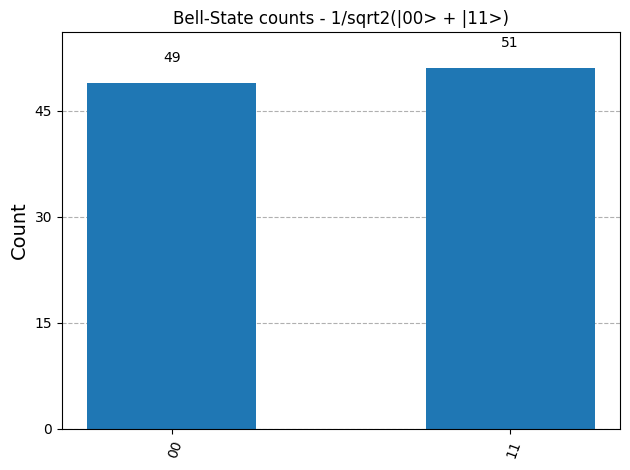

In [17]:
#bell1
bell1.measure_all()
circ = transpile(bell1, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|00> + |11>)')

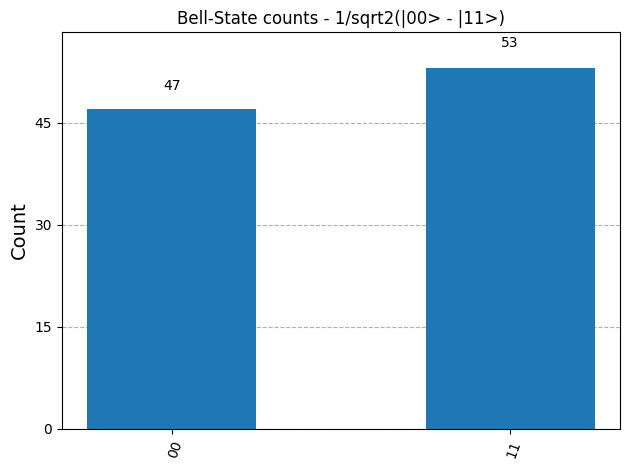

In [18]:
#bell2
bell2.measure_all()
circ = transpile(bell2, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|00> - |11>)')

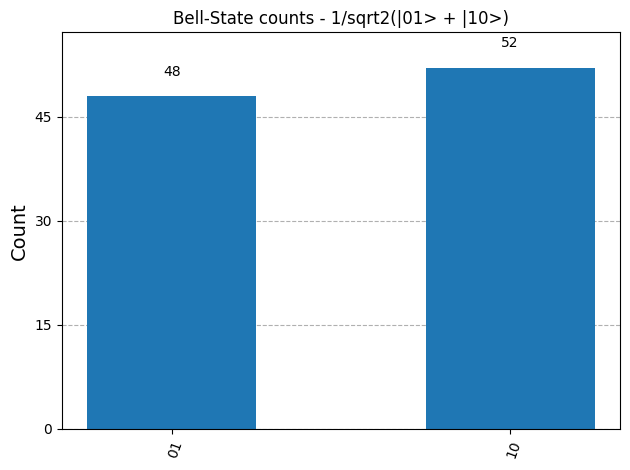

In [19]:
#bell3
bell3.measure_all()
circ = transpile(bell3, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|01> + |10>)')

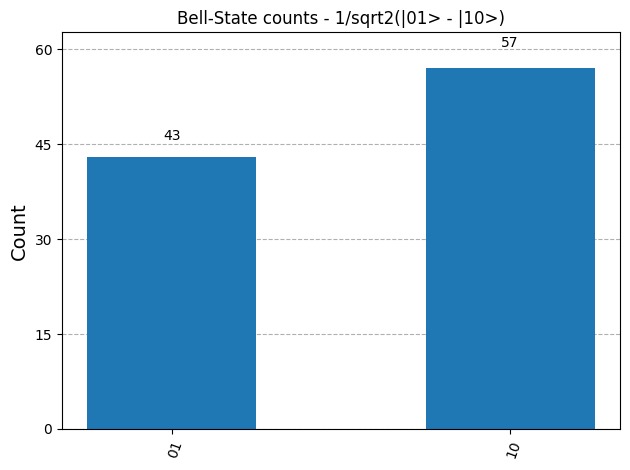

In [20]:
#bell4
bell4.measure_all()
circ = transpile(bell4, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - 1/sqrt2(|01> - |10>)')

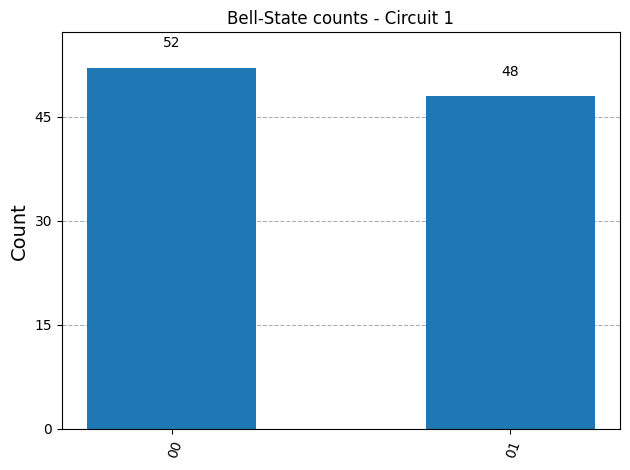

In [21]:
#circuit1
qc1.measure_all()
circ = transpile(qc1, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - Circuit 1')

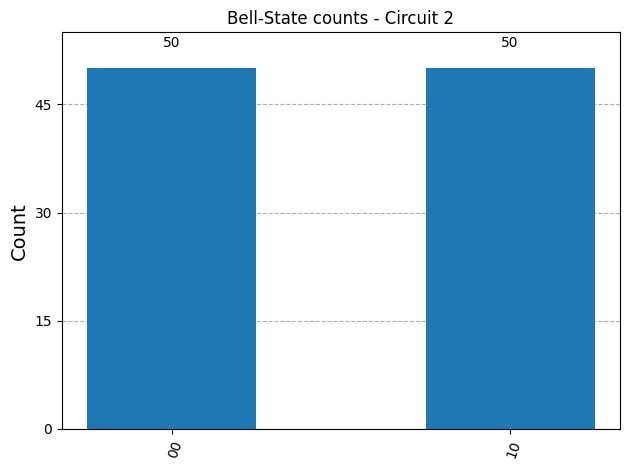

In [22]:
#circuit2
qc2.measure_all()
circ = transpile(qc2, simulator)
result = simulator.run(circ, shots=100).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts - Circuit 2')

## Cirq

In [23]:
qubits = cirq.GridQubit.square(2)
circuit1 = cirq.Circuit(cirq.H(qubits[0]), cirq.Z(qubits[0]))
print(circuit1)

(0, 0): ───H───Z───


In [24]:
qubits = cirq.GridQubit.square(2)
circuit2 = cirq.Circuit(cirq.X(qubits[1]), cirq.H(qubits[1]))
print(circuit2)

(0, 1): ───X───H───


In [25]:
qubits = cirq.GridQubit.square(2)
cx = cirq.CX(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([h])
moment1 = cirq.Moment([cx])
bell1 = cirq.Circuit((moment0, moment1))
print(bell1)

(0, 0): ───H───@───
               │
(0, 1): ───────X───


In [26]:
qubits = cirq.GridQubit.square(2)
cx = cirq.CX(qubits[0], qubits[1])
cz = cirq.CZ(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([h])
moment1 = cirq.Moment([cx])
moment2 = cirq.Moment([cz])
bell2 = cirq.Circuit((moment0, moment1, moment2))
print(bell2)

(0, 0): ───H───@───@───
               │   │
(0, 1): ───────X───@───


In [27]:
qubits = cirq.GridQubit.square(2)
x = cirq.X(qubits[1])
cx = cirq.CX(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([x, h])
moment1 = cirq.Moment([cx])
bell3 = cirq.Circuit((moment0, moment1))
print(bell3)

(0, 0): ───H───@───
               │
(0, 1): ───X───X───


In [28]:
qubits = cirq.GridQubit.square(2)
x = cirq.X(qubits[1])
cx = cirq.CX(qubits[0], qubits[1])
h = cirq.H(qubits[0])
moment0 = cirq.Moment([x, h])
moment1 = cirq.Moment([cz])
moment2 = cirq.Moment([cx])

bell4 = cirq.Circuit((moment0, moment1, moment2))
print(bell4)

(0, 0): ───H───@───@───
               │   │
(0, 1): ───X───@───X───


In [29]:
cirq.final_state_vector(circuit1)

array([ 0.70710677+0.j, -0.70710677+0.j], dtype=complex64)

In [30]:
cirq.final_state_vector(circuit2)

array([ 0.70710677+0.j, -0.70710677+0.j], dtype=complex64)

In [31]:
cirq.final_state_vector(bell1)

array([0.70710677+0.j, 0.        +0.j, 0.        +0.j, 0.70710677+0.j],
      dtype=complex64)

In [32]:
cirq.final_state_vector(bell2)

array([ 0.70710677+0.j,  0.        +0.j,  0.        +0.j, -0.70710677+0.j],
      dtype=complex64)

In [33]:
cirq.final_state_vector(bell3)

array([0.        +0.j, 0.70710677+0.j, 0.70710677+0.j, 0.        +0.j],
      dtype=complex64)

In [34]:
cirq.final_state_vector(bell4)

array([ 0.        +0.j,  0.70710677+0.j, -0.70710677+0.j,  0.        +0.j],
      dtype=complex64)

In [35]:
simulator = cirq.Simulator()

In [36]:
circuit1.append(cirq.measure(qubits[0], qubits[1]))
circuit2.append(cirq.measure(qubits[0], qubits[1]))
bell1.append(cirq.measure(qubits[0], qubits[1]))
bell2.append(cirq.measure(qubits[0], qubits[1]))
bell3.append(cirq.measure(qubits[0], qubits[1]))
bell4.append(cirq.measure(qubits[0], qubits[1]))

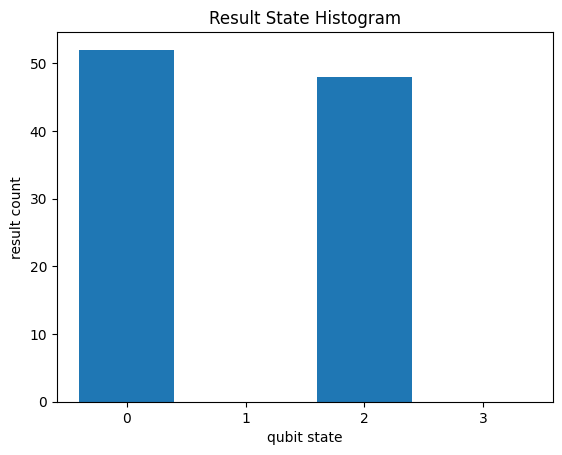

In [37]:
# circuit 1 histogram
result = simulator.run(circuit1, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

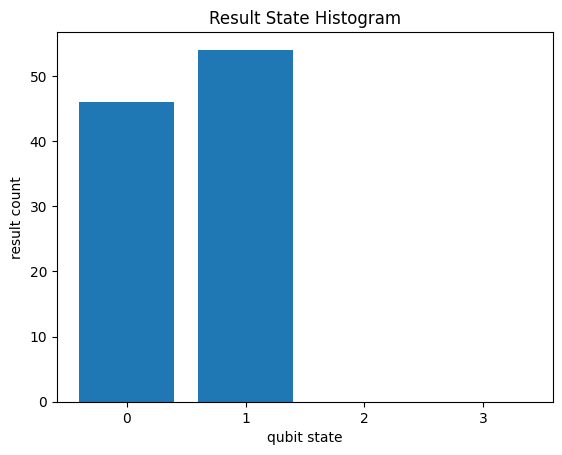

In [38]:
# circuit 2 histogram
result = simulator.run(circuit2, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

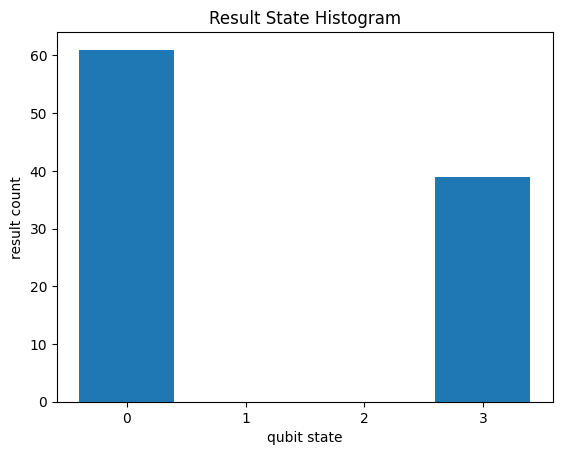

In [39]:
# bell1 histogram
result = simulator.run(bell1, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

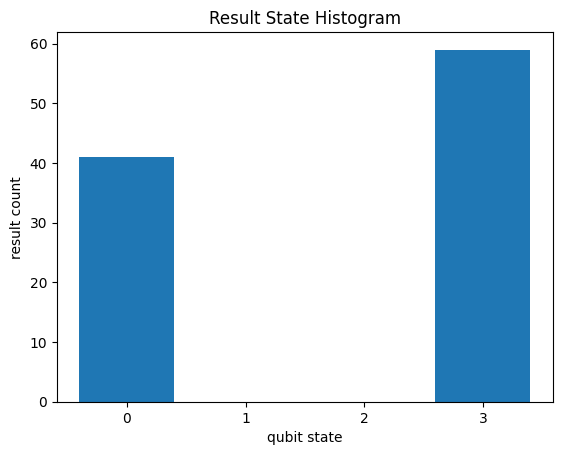

In [40]:
# bell2 histogram
result = simulator.run(bell2, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

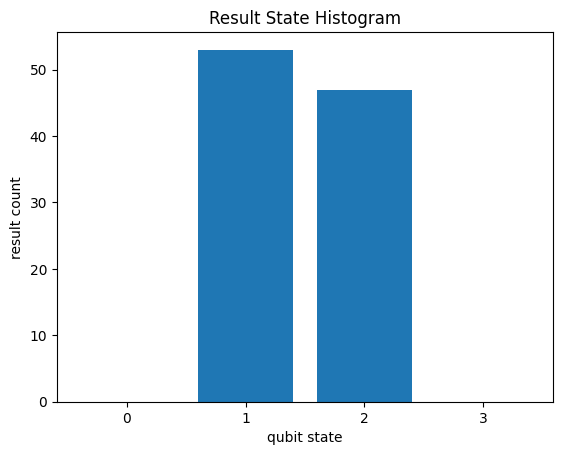

In [41]:
# bell3 histogram
result = simulator.run(bell3, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

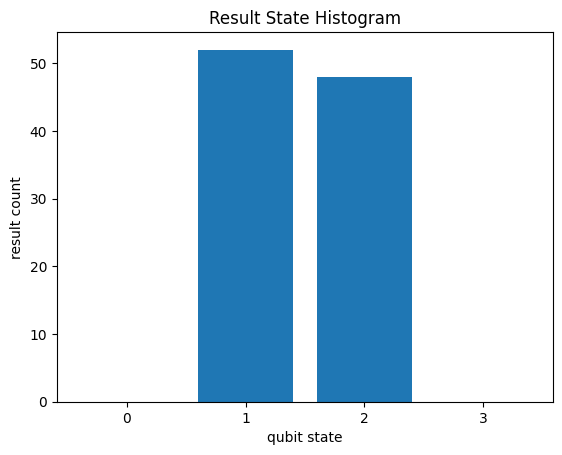

In [42]:
# bell4 histogram
result = simulator.run(bell4, repetitions=100)
_ = cirq.plot_state_histogram(result, plt.subplot())
plt.show()

## Pennylane

In [43]:
dev = qml.device("default.qubit", wires=2, shots=100)

@qml.qnode(dev)
def circuit1_fn():
    qml.H(wires=0)
    qml.Z(wires=0)
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))



@qml.qnode(dev)
def circuit2_fn():
    qml.X(wires=1)
    qml.H(wires=1)
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell1_fn():
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell2_fn():
    qml.H(wires=0)
    qml.CNOT(wires=[0,1])
    qml.CZ(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell3_fn():
    qml.H(wires=0)
    qml.X(wires=1)
    qml.CNOT(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

@qml.qnode(dev)
def bell4_fn():
    qml.H(wires=0)
    qml.X(wires=1)
    qml.CZ(wires=[1,0])
    qml.CNOT(wires=[0,1])
    qml.Snapshot(tag="s")
    return qml.counts(), qml.expval(qml.Z(0)), qml.var(qml.Z(1))

dev_unique_wires = qml.device('default.qubit', wires=['aux', 'q1', 'q2'])
circuit1 = qml.QNode(circuit1_fn, dev_unique_wires)
circuit2 = qml.QNode(circuit2_fn, dev_unique_wires)
bell1 = qml.QNode(bell1_fn, dev_unique_wires)
bell2 = qml.QNode(bell2_fn, dev_unique_wires)
bell3 = qml.QNode(bell3_fn, dev_unique_wires)
bell4 = qml.QNode(bell4_fn, dev_unique_wires)

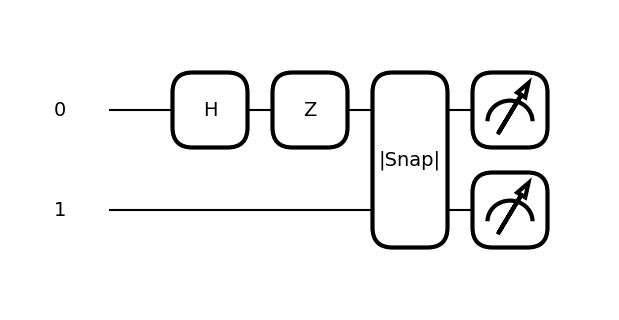

In [44]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit1)()
plt.show()

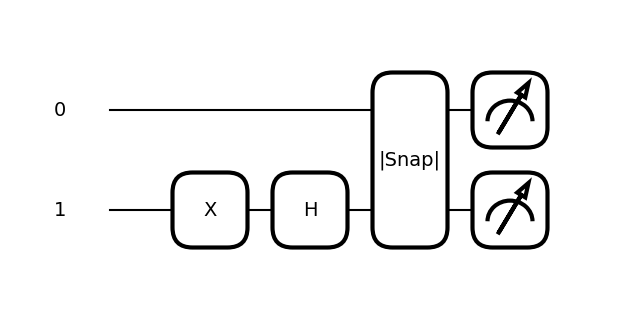

In [45]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(circuit2)()
plt.show()

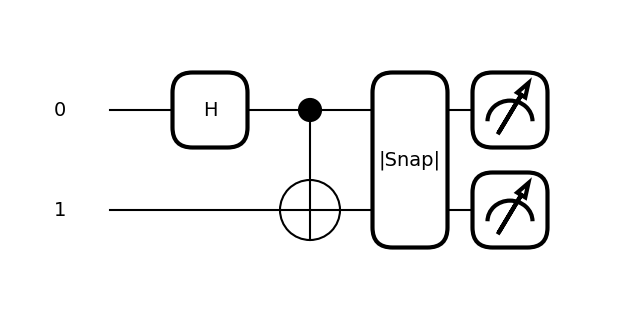

In [46]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell1)()
plt.show()

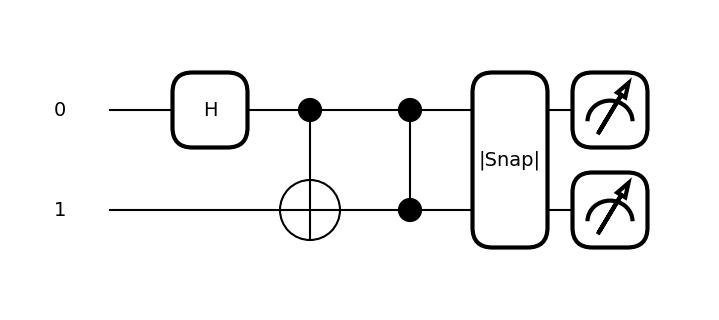

In [47]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell2)()
plt.show()

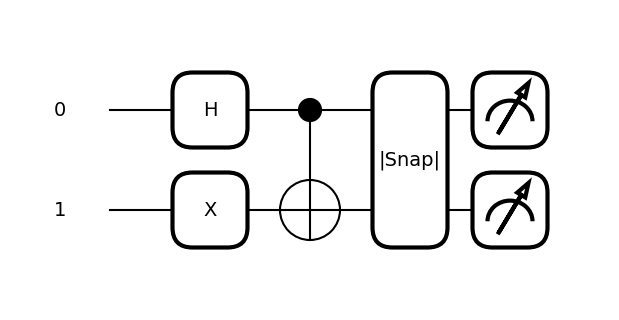

In [48]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell3)()
plt.show()

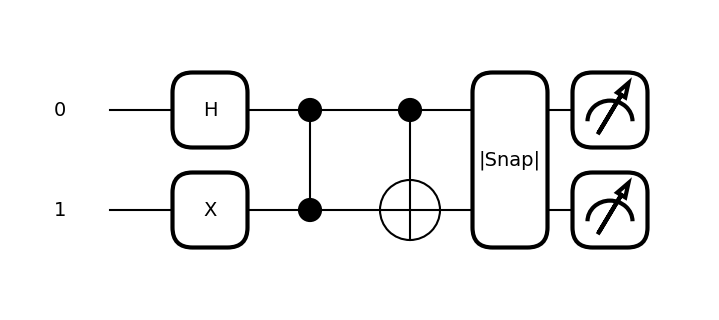

In [49]:
qml.drawer.use_style("black_white")
fig, ax = qml.draw_mpl(bell4)()
plt.show()

In [50]:
# circuit1 state
qml.snapshots(circuit1)()["s"]

array([ 0.70710678+0.j,  0.        +0.j, -0.70710678+0.j, -0.        +0.j])

In [51]:
# circuit2 state
qml.snapshots(circuit2)()["s"]

array([ 0.70710678+0.j, -0.70710678+0.j,  0.        +0.j,  0.        +0.j])

In [52]:
# bell1 state
qml.snapshots(bell1)()["s"]

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [53]:
# bell2 state
qml.snapshots(bell2)()["s"]

array([ 0.70710678+0.j,  0.        +0.j,  0.        +0.j, -0.70710678+0.j])

In [54]:
# bell3 state
qml.snapshots(bell3)()["s"]

array([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j, 0.        +0.j])

In [55]:
# bell4 state
qml.snapshots(bell4)()["s"]

array([ 0.        +0.j,  0.70710678+0.j, -0.70710678+0.j,  0.        +0.j])

In [56]:
circuit1_samples = circuit1()[0]
circuit2_samples = circuit2()[0]
bell1_samples = bell1()[0]
bell2_samples = bell2()[0]
bell3_samples = bell3()[0]
bell4_samples = bell4()[0]
samples = [circuit1_samples, circuit2_samples, bell1_samples, bell2_samples, bell3_samples, bell4_samples]

In [57]:
def bar_graph(sample):
    plt.figure(figsize=(7, 5))

    # Sort keys so the x-axis is always in order (00, 01, 10, 11)
    labels = sorted(sample.keys())
    values = [sample[k] for k in labels]

    bars = plt.bar(labels, values, color='skyblue', edgecolor='navy')

    # Styling
    plt.title("Measurement Results (100 Shots)", fontsize=14)
    plt.xlabel("State", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.ylim(0, max(values) + 20) # Extra room for text

    # Add numeric labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f'{int(yval)}', ha='center', va='bottom')

    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()
        
    

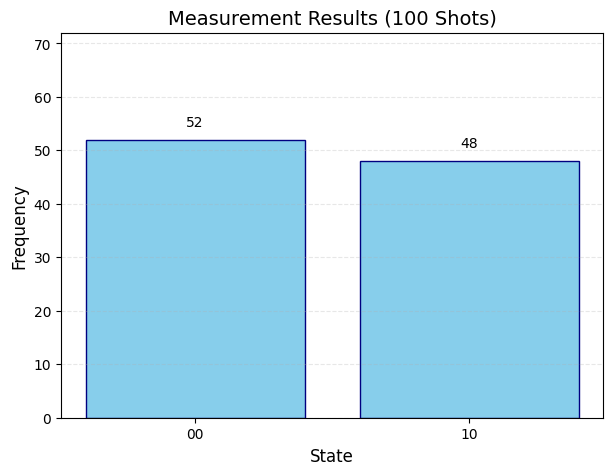

In [58]:
bar_graph(circuit1_samples)

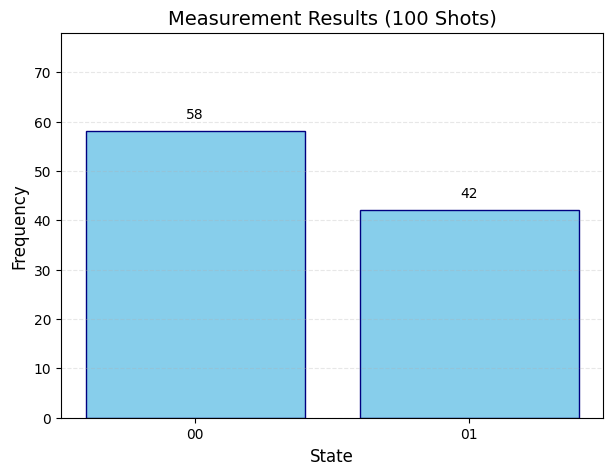

In [59]:
bar_graph(circuit2_samples)

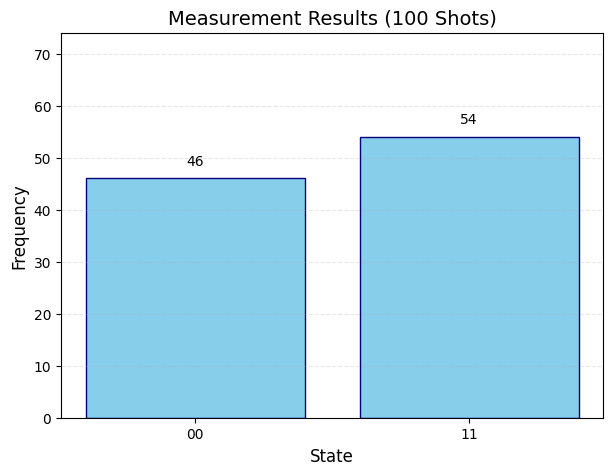

In [60]:
bar_graph(bell1_samples)

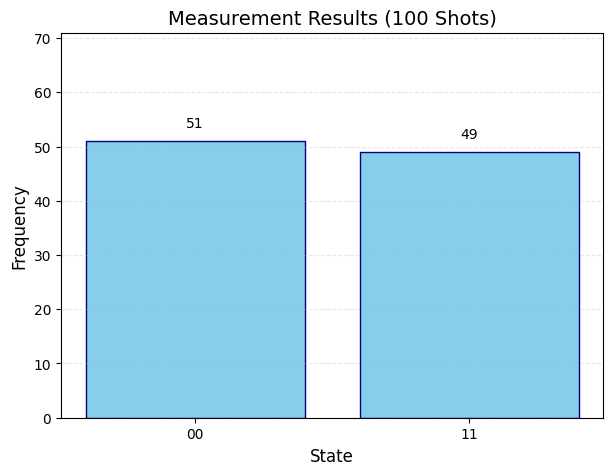

In [61]:
bar_graph(bell2_samples)

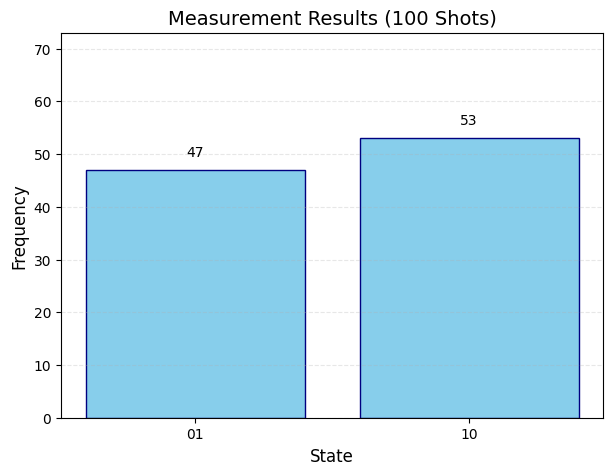

In [62]:
bar_graph(bell3_samples)

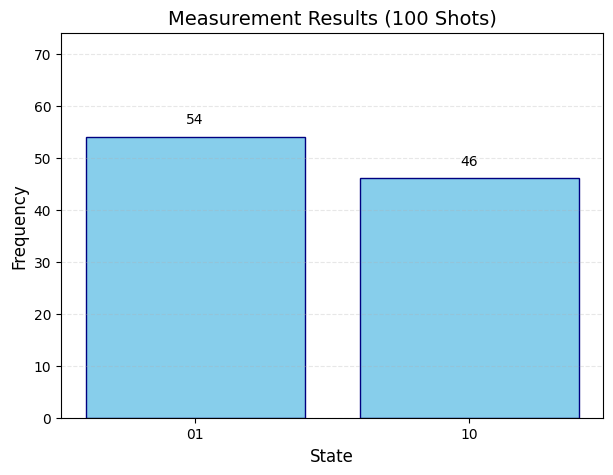

In [63]:
bar_graph(bell4_samples)

# Differences between frameworks
- Cirq and Pennylane drop wires that are unused. You must do something with them (measure/take a snapshot) in order to have them show up on the circuit diagram
- Pennylane represents measurement as taking the expectation value of a wire
- Pennylane treats circuits not as objects, but as fucntions. Pennylane uses the QNode represntation.
- Pennylane's Qnodes can be in several different modes, including analytic (for developing & testing outcomes) and shot-based (for simulating many outcomes)
- When displaying the histogram of measurements, cirq keeps track of the unused states (and displays them with a magnitude of 0)

# GHZ State

## Tasks

Create a GHZ state of 6 qubits using QISkit or Cirq. Obtain frequency plots for 10,000 samples when

- sample on qiskit aer wihtout noise and with simple noise

- sample on the "ionq_simulator" backend for ideal quantum devices and with noise models "aria-1" and "forte-1"

- sample on a real quantum computer ("ionq_qpu.forte-1") with and without error-mitigation.

- Using your IBMQE account, find the least busy IBM quantum device, then i) perform the sampling on this quantum device and ii) simulate the sampling using the QISkit noise model for this quantum device.

# Sampling on AER with/without noise

In [64]:
from qiskit import QuantumCircuit
nqubits = 6
ghz = QuantumCircuit(nqubits)
ghz.h(0)
for i in range(1,nqubits):
    ghz.cx(i-1,i)
#ghz.measure_all()
ghz.draw()

┌───┐                         
q_0: ┤ H ├──■──────────────────────
     └───┘┌─┴─┐                    
q_1: ─────┤ X ├──■─────────────────
          └───┘┌─┴─┐               
q_2: ──────────┤ X ├──■────────────
               └───┘┌─┴─┐          
q_3: ───────────────┤ X ├──■───────
                    └───┘┌─┴─┐     
q_4: ────────────────────┤ X ├──■──
                         └───┘┌─┴─┐
q_5: ─────────────────────────┤ X ├
                              └───┘

In [65]:
simulator = AerSimulator()
transpiled = transpile(ghz, simulator, optimization_level=0)
sv = Statevector.from_circuit(transpiled)
print(sv)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +

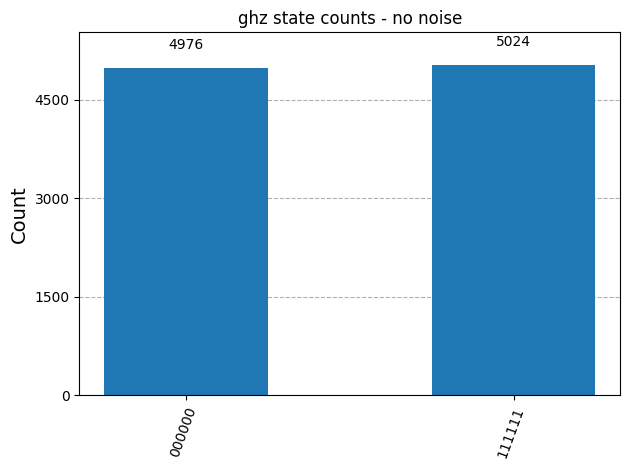

In [66]:
ghz.measure_all()
circ = transpile(ghz, simulator)
result = simulator.run(circ, shots=10000).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='ghz state counts - no noise')

In [67]:
backend_qpuA1 = provider.get_backend("ionq_qpu.aria-1")    #25-qubit machine
## 8/24/24: Aria-2 offline ... not fixed by Sep.2025
# backend_qpuA2 = provider.get_backend("ionq_qpu.aria-2")  #25-qubit machine
backend_qpuF1 = provider.get_backend("ionq_qpu.forte-1")   #36-qubit machine
## 5/30/25: forte-enterprise-1 (QPU at Basel Quantum) also open for QLab users
backend_qpuFE1 = provider.get_backend("ionq_qpu.forte-enterprise-1")  #36-qubit machine

use_current_calib = None
## or:
use_current_calib = 'mean'
## or: 
# use_current_calib = 'median'
## or:
# use_current_calib = both'
## then estimate the variation from geom.mean and median
Nshots = 10000

from qiskit import transpile
from qiskit_aer.noise import NoiseModel, depolarizing_error, pauli_error 
from qiskit_aer import AerSimulator

# Define the basic gate set (1- and 2-qubit gates)
one_qubit_gates = ["rx", "ry", "rz"]
two_qubit_gates = ["rxx"]
two_qubit_gates_forte = ["cz"]

## IonQ Harmony (11 qubits - retired Sep.2024) fidelity (as of Aug.2023):
##    1-qubit gates 99.5%, 2-qubit gate 97.5%, SPAM 99.75%
depolar_error_1q_harmony = 1.0-0.995
depolar_error_2q_harmony = 1.0-0.975
spam_error_harmony = 1.0-0.9975           # SPAM=state-preparation-and-measurement

## IonQ Aria (25 qubits) fidelity  (as of early Feb/25 or current calibration)
##  (see also: https://cloud.ionq.com/backends)
fid_1q = 0.9998
fid_2q = 0.9870
fid_spam = 0.9945
## actual calibration values (name of dict changed)
if use_current_calib in ['mean','median','both','all', True, 1]:
    try:
        cal = backend_qpuA1.calibration().fidelities
    except:
        cal = backend_qpuA1.calibration().fidelity
    if not isinstance(use_current_calib, str):
        use_current_calib = 'median'
    if use_current_calib in ['mean','both','all', True, 1] and 'mean' not in cal['2q'].keys():
        use_current_calib = 'median'
    if use_current_calib in ['mean', 'median']:
        fid_1q = cal['1q'][use_current_calib] or fid_1q
        fid_2q = cal['2q'][use_current_calib] or fid_2q
        fid_spam = cal['spam'][use_current_calib] or fid_spam
    elif use_current_calib in ['both','all', True, 1]:
        fid_1q = cal['1q']['median'] or fid_1q
        fid_2q = cal['2q']['median'] or fid_2q
        fid_spam = cal['spam']['median'] or fid_spam
        fid_1q_err_aria = fid_1q - cal['1q']['mean']
        fid_2q_err_aria = fid_2q - cal['2q']['mean']
        fid_spam_err_aria = fid_spam - cal['spam']['mean']
depolar_error_1q_aria = 1.0 - fid_1q
depolar_error_2q_aria = 1.0 - fid_2q
spam_error_aria = 1.0 - fid_spam 

## IonQ forte (36 qubits) fidelity (as of 2/8/25 or current calibration):
fid_1q = 0.9999
fid_2q = 0.9954
fid_spam = 0.9955
if use_current_calib in ['mean','median','both','all', True, 1]:
    try:
        cal = backend_qpuF1.calibration().fidelities
    except:
        cal = backend_qpuF1.calibration().fidelity
    if use_current_calib in ['mean', 'median']:
        fid_1q = cal['1q'][use_current_calib] or fid_1q
        fid_2q = cal['2q'][use_current_calib] or fid_2q
        fid_spam = cal['spam'][use_current_calib] or fid_spam
    elif use_current_calib in ['both','all', True, 1]:
        fid_1q = cal['1q']['median'] or fid_1q
        fid_2q = cal['2q']['median'] or fid_2q
        fid_spam = cal['spam']['median'] or fid_spam
        fid_1q_err_forte = fid_1q - cal['1q']['mean']
        fid_2q_err_forte = fid_2q - cal['2q']['mean']
        fid_spam_err_forte = fid_spam - cal['spam']['mean']
depolar_error_1q_forte = 1.0 - fid_1q
depolar_error_2q_forte = 1.0 - fid_2q
spam_error_forte = 1.0 - fid_spam 

## create noise models
noise_model_aria = NoiseModel()
noise_model_aria.add_all_qubit_quantum_error(
    depolarizing_error(depolar_error_1q_aria, 1), one_qubit_gates)
noise_model_aria.add_all_qubit_quantum_error(
    depolarizing_error(depolar_error_2q_aria, 2), two_qubit_gates)
noise_model_aria.add_all_qubit_quantum_error(
    pauli_error([('Z',spam_error_aria), ('I', 1.0-spam_error_aria)] ), "measure")

noise_model_forte = NoiseModel()
noise_model_forte.add_all_qubit_quantum_error(
    depolarizing_error(depolar_error_1q_forte, 1), one_qubit_gates)
noise_model_forte.add_all_qubit_quantum_error(
    depolarizing_error(depolar_error_2q_forte, 2), two_qubit_gates_forte)
noise_model_forte.add_all_qubit_quantum_error(
    pauli_error([('Z',spam_error_forte), ('I', 1.0-spam_error_forte)] ), "measure")

# Define backends
backend_sim_aria = AerSimulator(noise_model=noise_model_aria, 
                                basis_gates=one_qubit_gates+two_qubit_gates)
backend_sim_forte = AerSimulator(noise_model=noise_model_forte, 
                                basis_gates=one_qubit_gates+two_qubit_gates_forte)
# Perform a noise simulation
tcircA = transpile(ghz, backend_sim_aria)
counts_aria = backend_sim_aria.run(tcircA, shots=Nshots).result().get_counts(0)
tcircF = transpile(ghz, backend_sim_forte)
counts_forte = backend_sim_forte.run(tcircF, shots=Nshots).result().get_counts(0)
print("Aria results: ",counts_aria)
print()
print("Forte results: ",counts_forte)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/qiskit_ionq/ionq_backend.py:127: IonQTranspileLevelWarning: Transpiler default optimization_level=2. IonQ (QIS) recommends 0-1 to avoid aggressive re-synthesis; use transpile(..., optimization_level=1).
  warn_bad_transpile_level()


Aria results:  {'000010': 141, '011010': 119, '101110': 146, '110000': 187, '111111': 207, '101111': 135, '011100': 117, '100101': 123, '000001': 175, '100011': 146, '101101': 148, '110011': 186, '010101': 156, '101011': 143, '110010': 150, '010001': 161, '010110': 139, '010111': 134, '001101': 188, '010010': 140, '001011': 159, '011011': 146, '001001': 148, '010000': 141, '100110': 136, '011111': 142, '111010': 160, '111100': 163, '001000': 160, '001111': 186, '110101': 157, '100000': 142, '111110': 194, '100010': 142, '110001': 187, '011101': 144, '000101': 171, '000000': 171, '111101': 189, '110110': 176, '000111': 183, '010100': 141, '000100': 169, '101000': 151, '001100': 166, '111011': 187, '011000': 133, '100100': 159, '001010': 176, '000110': 165, '110100': 173, '100111': 131, '101100': 130, '101001': 125, '000011': 181, '100001': 133, '111001': 144, '111000': 193, '101010': 140, '010011': 145, '011001': 122, '110111': 175, '001110': 177, '011110': 146}

Forte results:  {'11101

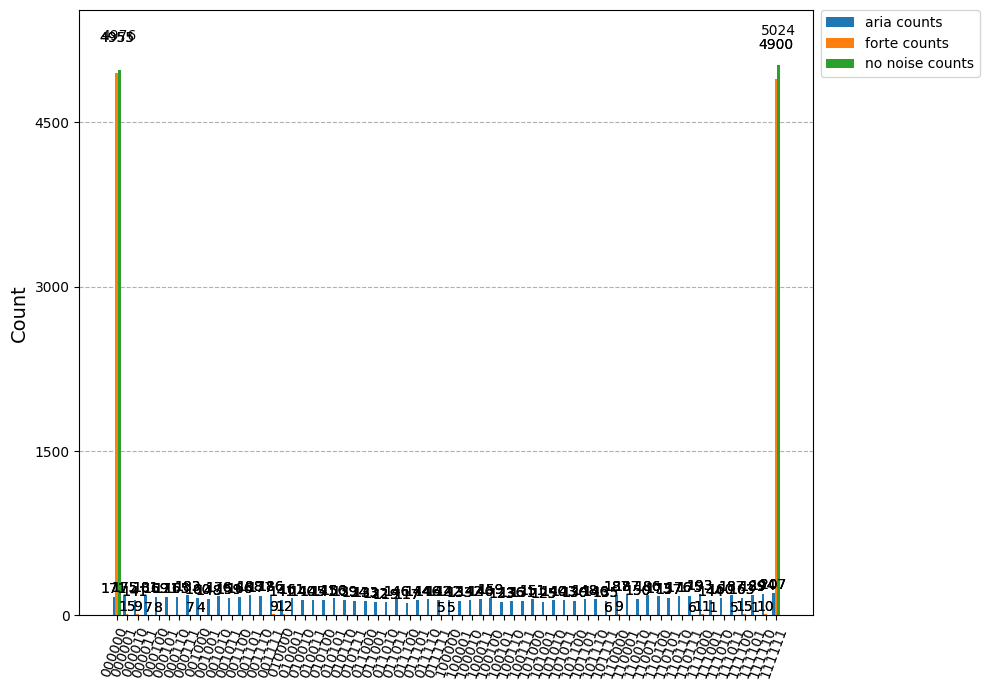

In [68]:
legend = ["aria counts", "forte counts", "no noise counts"]
display(plot_histogram([counts_aria, counts_forte, counts], legend=legend, figsize=(10,7)))

# Sampling on ionq_simulator backends

In [75]:
# Only need to run once:

provider = IonQProvider()
backend_sim = provider.get_backend("ionq_simulator")

## run circuit on IonQ simulator
## this may take a few seconds because the (serialized) circuit is processed on IonQ cloud servers
Nshots = 10000
seed = 97531

## 'ideal' simulation
#jobI = backend_sim.run(ghz, shots=Nshots, sampler_seed=seed)
#countsI = jobI.result().get_counts()
#probsI = jobI.result().get_probabilities()
#print("IonQ sim for 'ideal':\n  probabilities: {};\n  counts: {}".format(probsI, countsI))
#print()
## Note: the results from job.get_probabilities() are correct
## job.get_counts() for Simulator jobs uses a local random number generator for sampling



In [76]:
#Only need to run once

#jobA = backend_sim.run(ghz, shots=Nshots, sampler_seed=seed, noise_model="aria-1")
#countsA = jobA.result().get_counts()
#probsA = jobA.result().get_probabilities()
#print("IonQ sim for 'aria-1':\n  probabilities: {};\n  counts: {}".format(probsA, countsA))
#print()

In [94]:
no_noise_id = "019c7cc6-29cb-7667-bca2-00351604a8fb"
aria_id = "019c7cc6-455d-74cc-a444-32f4023f99a5"
no_noise_job = backend_sim.retrieve_job(no_noise_id)
aria_job = backend_sim.retrieve_job(aria_id)

counts_no_noise = no_noise_job.result().get_counts()
aria_counts = aria_job.result().get_counts()
print(counts_no_noise)

{'000000': 4932, '111111': 5068}


# The Forte simulation was taking upwards of 5 minutes to run & was not returning with a value. Wasn't sure what was wrong, so I left the code here. Possibly an issue on the IONQ end.

In [95]:
#jobF = backend_sim.run(ghz, shots=Nshots, sampler_seed=seed, noise_model="forte-1")
#countsF = jobF.result().get_counts()
#probsF = jobF.result().get_probabilities()
#print("IonQ sim for 'forte-1':\n  probabilities: {};\n  counts: {}".format(probsF, countsF))
#print()

In [96]:
##  adding QISkit's AER simulator (on local device) and histogram plotter
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

countsAER = Aer.get_backend("aer_simulator").run(ghz, shots=Nshots).result().get_counts()
probsAER = {k:v/Nshots for k,v in countsAER.items()}
print(countsAER)

{'000000': 5035, '111111': 4965}


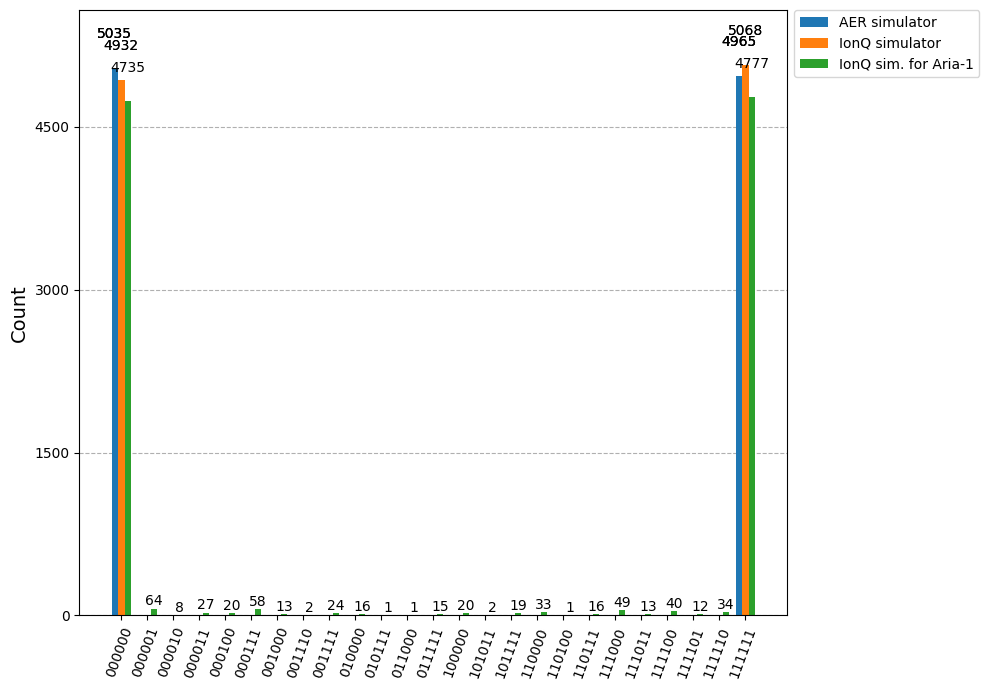

In [97]:
## first histogram: counts
#legend = ["AER simulator", "IonQ simulator", "IonQ sim. for Aria-1", "IonQ sim. for Forte-1"]
#display(plot_histogram([countsAER, countsI, countsA, countsF], legend=legend, figsize=(10,7)))
legend = ["AER simulator", "IonQ simulator", "IonQ sim. for Aria-1"]
display(plot_histogram([countsAER, counts_no_noise, aria_counts], legend=legend, figsize=(10,7)))

# Sampling on a real quantum computer

In [72]:
#backend_qpuF1n = provider.get_backend("ionq_qpu.forte-1", gateset="native")
#ghzF = transpile(ghz, backend=backend_qpuF1n)

backend_qpuF1n = provider.get_backend("ionq_qpu.forte-enterprise-1", gateset="native")
ghzF = transpile(ghz, backend=backend_qpuF1n)

In [71]:
# ONLY NEED TO RUN ONCE TO SUBMIT THE JOBS & RETRIEVE JOB IDs
Nshots = 1000
seed = 97531


#job_1 = backend_qpuF1n.run(ghzF, shots=Nshots, error_mitigation=ErrorMitigation.NO_DEBIASING)
#job_2 = backend_qpuF1n.run(ghzF, shots=Nshots, error_mitigation=ErrorMitigation.DEBIASING)

#print(f"Job IDs: {job_1.job_id()} and {job_2.job_id()}")

In [70]:
mitigation_id = "019c8879-4a12-7357-8a28-2dfcf7196b67"
non_mitigation_id = "019c8879-492b-7745-b67d-010cdeabdff7"

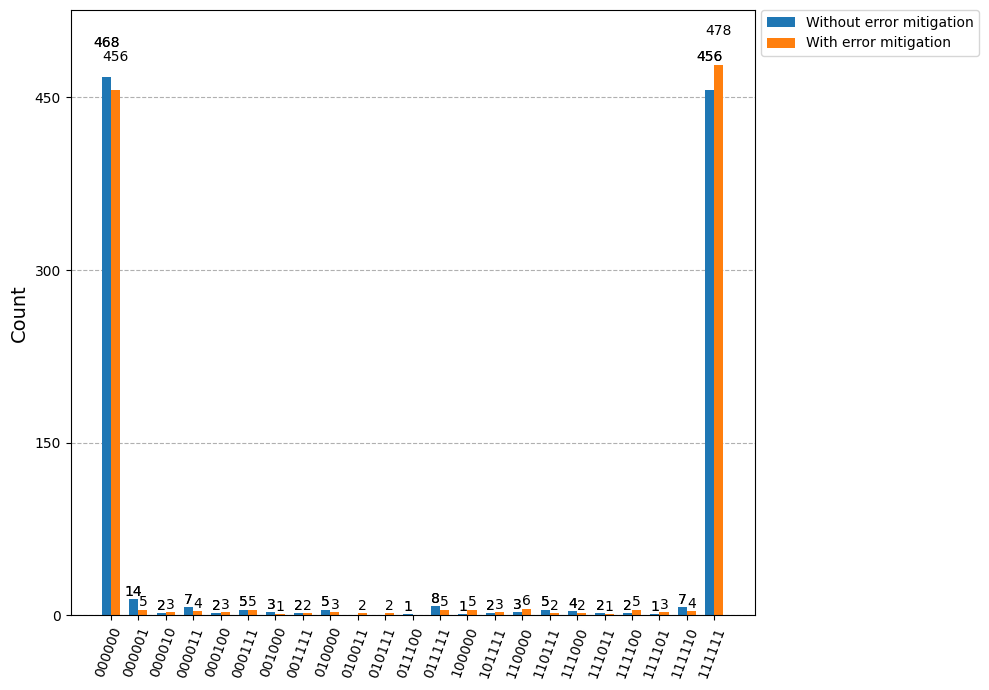

In [73]:
# run this when the jobs are finished
job_em = backend_qpuF1n.retrieve_job(mitigation_id)
job_no_em = backend_qpuF1n.retrieve_job(non_mitigation_id)

counts_raw = job_no_em.result().get_counts()
counts_mitigated = job_em.result().get_counts()

legend = ["Without error mitigation", "With error mitigation"]
display(plot_histogram([counts_raw, counts_mitigated], legend=legend, figsize=(10,7)))

# Extra credit: sample on least busy ibm

In [81]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, SamplerV2 as Sampler

service = QiskitRuntimeService()


qiskit_runtime_service.__init__:WARNING:2026-02-20 15:45:49,638: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: open-instance. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().


In [82]:
backends = service.backends(operational=True)
print(backends)

# Try to get least busy backend
least_busy_backend = service.least_busy(simulator=False, operational=True)
print(least_busy_backend)

qiskit_runtime_service.backends:WARNING:2026-02-20 15:45:53,030: Loading instance: open-instance, plan: open


[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_torino')>, <IBMBackend('ibm_marrakesh')>]


qiskit_runtime_service.backends:WARNING:2026-02-20 15:45:56,599: Loading instance: open-instance, plan: open
qiskit_runtime_service.backends:WARNING:2026-02-20 15:45:57,930: Using instance: open-instance, plan: open


<IBMBackend('ibm_torino')>


In [86]:
sampler = Sampler(mode=least_busy_backend)

transpiled_ghz = transpile(ghz, backend=least_busy_backend, optimization_level=3)
print(transpiled_ghz)

global phase: 3π/4
          ┌─────────┐┌────┐┌─────────┐                                        »
q_0 -> 54 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├─■──────────────────────────────────────»
          ├─────────┤├────┤└┬───────┬┘ │                                      »
q_5 -> 57 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├──┼──────────────────────────────────────»
          ├─────────┤├────┤ ├───────┤  │                                      »
q_4 -> 58 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├──┼──────────────────────────────────────»
          ├─────────┤├────┤ ├───────┤  │                                      »
q_3 -> 59 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├──┼──────────────────────────────────────»
          ├─────────┤├────┤ ├───────┤  │                     ┌────┐┌─────────┐»
q_2 -> 60 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├──┼───────────────────■─┤ √X ├┤ Rz(π/2) ├»
          ├─────────┤├────┤ ├───────┤  │ ┌────┐┌─────────┐ │ └────┘└─────────┘»
q_1 -> 61 ┤ Rz(π/2) ├┤ √X ├─┤ Rz(π) ├──■─┤ √X ├┤ Rz(π/2) ├─■──────────────────»
          └─────────┘

In [87]:
job = sampler.run([transpiled_ghz])

In [90]:
job.status()

'DONE'

In [89]:
if job.status() == "DONE":
    result = job.result()

In [91]:
# Access the first circuit's result
pub_result = result[0]

# Get counts (e.g., {'00': 512, '11': 512})
counts = pub_result.data.meas.get_counts()
print(counts)

{'000000': 1834, '101000': 1, '100000': 33, '111111': 1657, '000011': 19, '111110': 64, '000111': 67, '110111': 86, '000001': 32, '010000': 24, '001111': 40, '011111': 22, '111000': 42, '110000': 22, '001000': 31, '110110': 5, '111011': 16, '000110': 8, '001001': 2, '011011': 1, '010001': 2, '101111': 20, '111100': 10, '111101': 21, '110011': 4, '011101': 1, '000100': 6, '000010': 14, '111010': 3, '000101': 3, '100001': 1, '101010': 1, '101101': 1, '100111': 1, '110100': 1, '001011': 1}


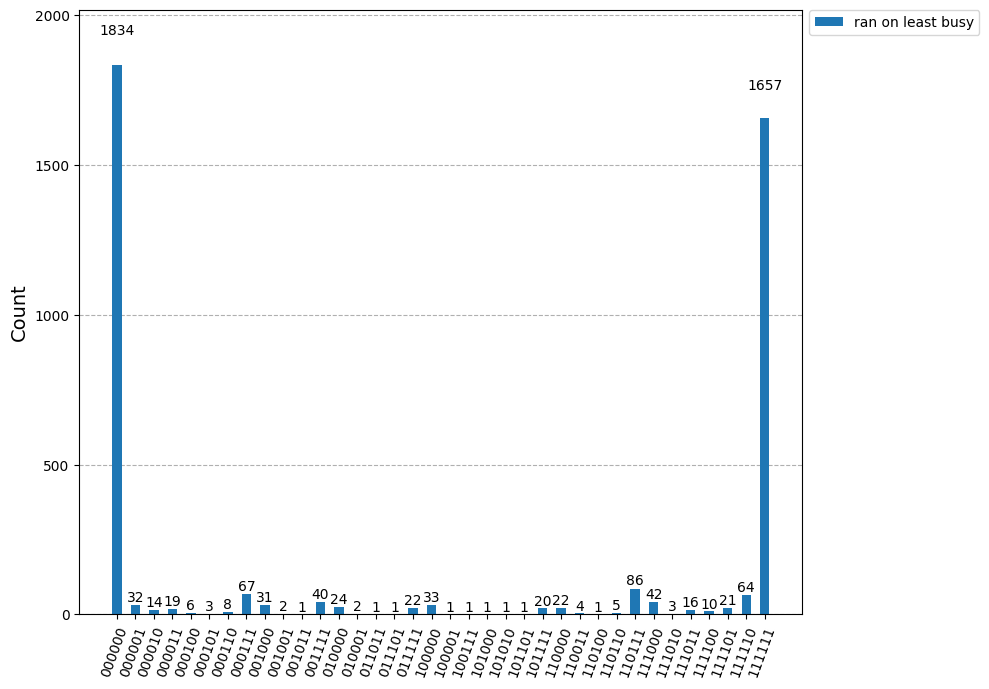

In [92]:
display(plot_histogram([counts], legend=["ran on least busy"], figsize=(10,7)))

# Noisy simulation of the least busy IBM machine

In [93]:
noisy_sim = AerSimulator.from_backend(least_busy_backend)

In [95]:
transpiled_ghz_noisy_sim = transpile(ghz, noisy_sim)

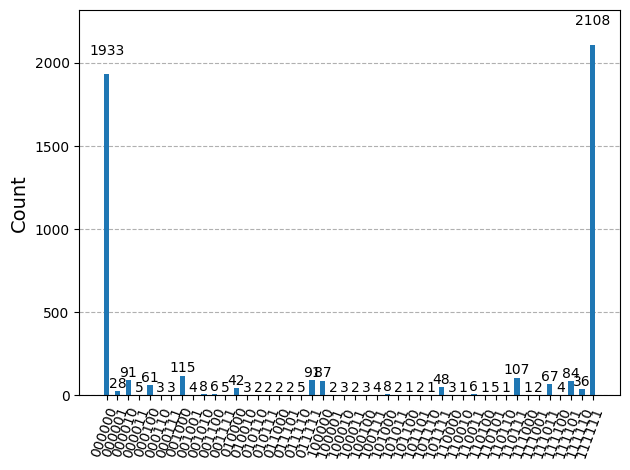

In [99]:
result = noisy_sim.run(transpiled_ghz_noisy_sim, shots=5000).result()
counts = result.get_counts()
display(plot_histogram([counts]))